In [1]:
#EDA ---Exploratory Data Analysis
# we try to analyse the data using visualizations.
# Preprocessing : Understanding the data columns
# 1.Missing value tratment 
#(Numerical col===>if there is outlier we should fill missing value by median
#                  if there is no outlier we should fill missing value by mean
# (categorical col ===>mode value)
#2.Outlier Removal/treatment :
# 1.IQR method  2.Z-score method(near to normal dist)
# 3.To see correlation ,skewness ,kurtosis
#4.Numerical===> Scaling  ( Minmax scaler,Standardization)
#  Categorical ===>Encoding ( Label Encoder,One hot encoder)


In [1]:
# importing the libraries
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
# get current working dir
print(os.getcwd())

C:\Users\Admin\Desktop\it_VEDANT\IT_vedant_training\Data Science\ML


In [4]:
#print working dir


NameError: name 'pwd' is not defined

In [2]:
# 
print(os.path.isfile('Employee_Data.xls'))

True


In [7]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Importing the excel file
df=pd.read_excel('Employee_Data.xls')

In [4]:
df.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [5]:
#finding the shape of our data
mydata=df.copy()

In [6]:
mydata.shape

(100, 7)

In [12]:
# to find columns of the data
mydata.columns

Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [14]:
mydata.describe()

,Employee Id,Age,Experience,Salary
count,100.000000,82.000000,90.000000,100.000000
mean,50.500000,37.975610,14.766667,65066.760000
std,29.011492,9.515388,6.889252,26189.874212
min,1.000000,22.000000,0.000000,11830.000000
25%,25.750000,27.250000,9.250000,48526.000000
50%,50.500000,42.000000,16.500000,73500.500000
75%,75.250000,45.750000,21.000000,86621.250000
max,100.000000,50.000000,25.000000,98180.000000


In [8]:
# to find the unique values in each column
lst=['Department','Age','Experience','Salary']
for i in lst:
    print(i,mydata[i].unique())
    print('**********************************')
          

Department ['Sales and Marketing' 'Customer Relations' 'Accounting' nan]
**********************************
Age [28. 22. 27. 26. 24. 29. 30. 25. 33. 36. 35. 40. 39. nan 38. 41. 44. 50.
 47. 43. 48. 46. 42. 49. 45.]
**********************************
Experience [ 3.  1.  0.  5.  6.  2. nan 13.  7. 10. 12. 14. 15.  9. 11.  8. 25. 17.
 21. 19. 22. 16. 18. 23. 24. 20.]
**********************************
Salary [32889 15944 40343 19018 24795 15387 34117 16099 42105 11891 34687 23549
 29110 33435 11830 44065 13266 16631 29886 30464 14943 18632 38183 43093
 26573 51228 57902 54233 70010 74683 53867 60117 72055 50013 50118 72318
 53828 58362 63391 62983 65939 51715 54250 50462 64418 60164 66528 57278
 71607 61222 68388 94704 89493 94310 81615 84306 77452 76904 90798 86261
 78332 84881 76528 83524 89258 75431 91870 76708 95222 90802 86277 77330
 85286 90930 88833 95908 92365 93854 85336 79898 84708 88381 93206 91795
 96432 83300 94778 82283 97056 87654 89875 98180 84185 79509 97990 79077
 81187

In [9]:
# to find no of null or missing values :
mydata.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [10]:
# treating the missing values :
#1.Department :Categorical so we should go for mode
mydata['Department'].value_counts()
# mode is Sales and Marketing

Department
Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: count, dtype: int64

In [11]:
mydata['Department']=mydata['Department'].fillna('Sales and Marketing')

In [12]:
mydata['Department'].isnull().sum()

0

In [13]:
mydata.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department      0
Age            18
Experience     10
Salary          0
dtype: int64

<Axes: ylabel='Age'>

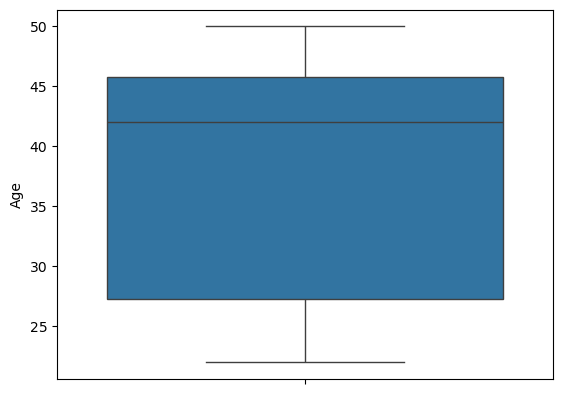

In [14]:
# next to find null values for age and exp
sns.boxplot(mydata['Age'])

<Axes: ylabel='Experience'>

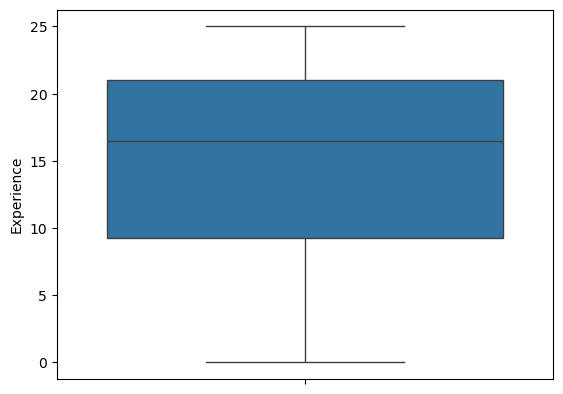

In [15]:
sns.boxplot(mydata['Experience'])

In [16]:
#finding the means of age and exp
age_mean=np.mean(mydata['Age'])
exp_mean=np.mean(mydata['Experience'])
print(age_mean,exp_mean)


37.97560975609756 14.766666666666667


In [17]:
mydata['Age']=mydata['Age'].fillna(age_mean)
mydata['Experience']=mydata['Experience'].fillna(exp_mean)

In [18]:
mydata.isnull().sum()

Employee Id    0
First Name     0
Last Name      0
Department     0
Age            0
Experience     0
Salary         0
dtype: int64

In [19]:
# visualizations
dep=mydata['Department'].value_counts()

In [20]:
dep

Department
Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1ae259934d0>,
 [Text(0.03455180204558485, 1.0994572174374968, 'Sales and Marketing'),
  Text(-0.7778173864806728, -0.777817532129725, 'Accounting'),
  Text(0.8018655733548674, -0.7530017279317957, 'Customer Relations')],
 [Text(0.018846437479409915, 0.5997039367840891, '49.00%'),
  Text(-0.4242640289894578, -0.42426410843439544, '27.00%'),
  Text(0.4373812218299276, -0.41072821523552483, '24.00%')])

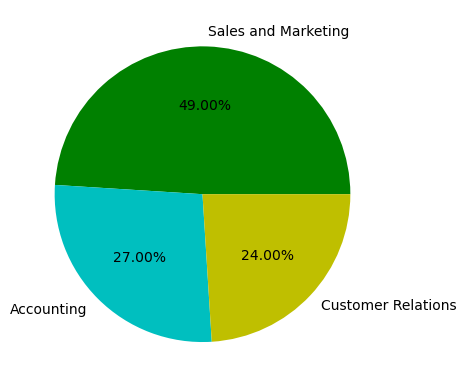

In [28]:
plt.pie(dep,labels=['Sales and Marketing','Accounting','Customer Relations'],autopct='%0.2f%%',colors=['g','c','y'])

<Axes: xlabel='Age', ylabel='Experience'>

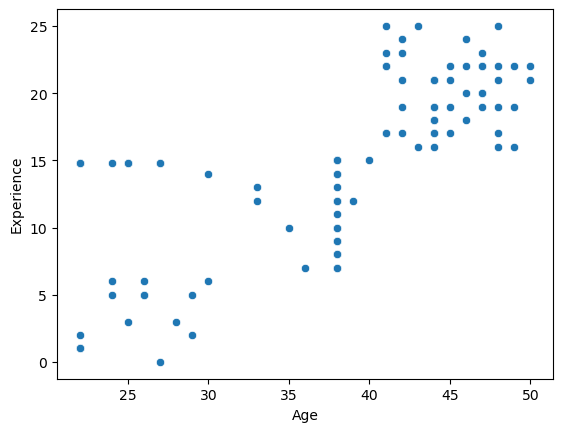

In [21]:
sns.scatterplot(data=mydata,x='Age',y='Experience')

<Axes: xlabel='Age', ylabel='Salary'>

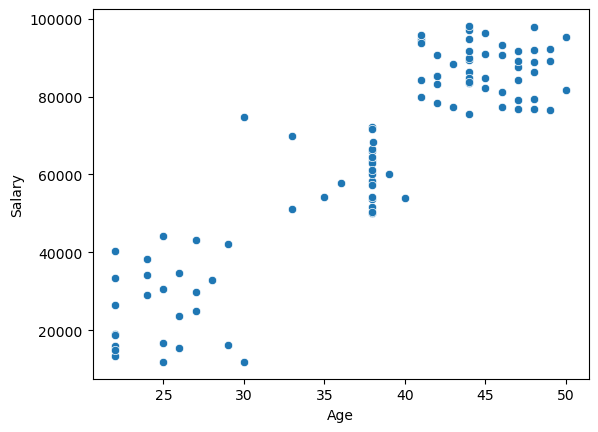

In [22]:
sns.scatterplot(data=mydata,x='Age',y='Salary')

<Axes: xlabel='Experience', ylabel='Salary'>

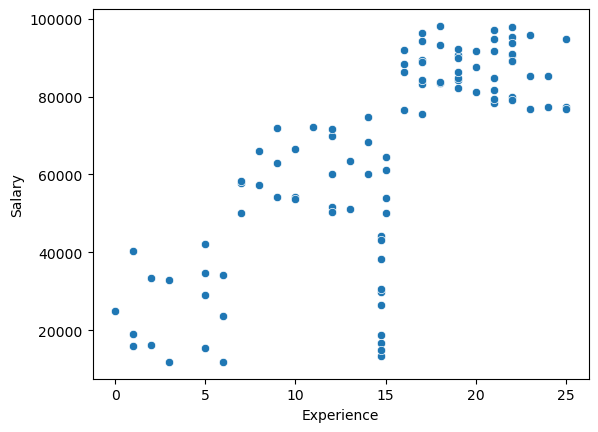

In [23]:
sns.scatterplot(data=mydata,x='Experience',y='Salary')

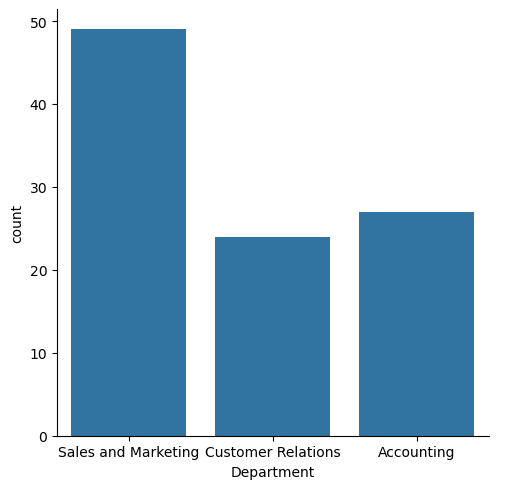

In [24]:
sns.catplot(data=mydata,x='Department',kind='count')

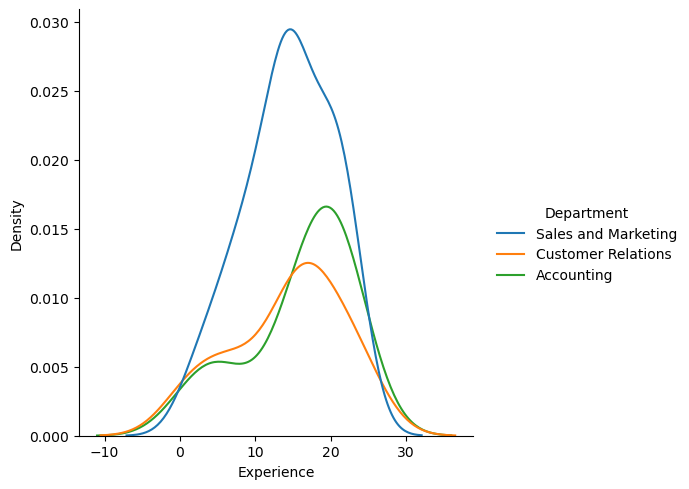

In [25]:
sns.displot(data=mydata,x='Experience',kind='kde',hue='Department')

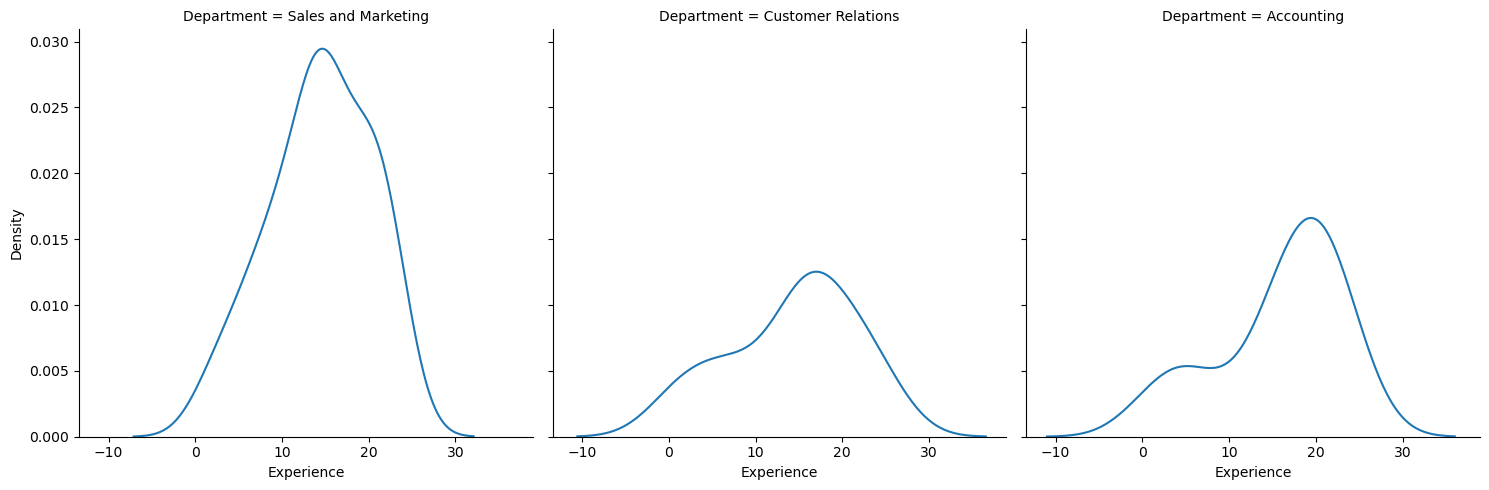

In [26]:
sns.displot(data=mydata,x='Experience',kind='kde',col='Department')

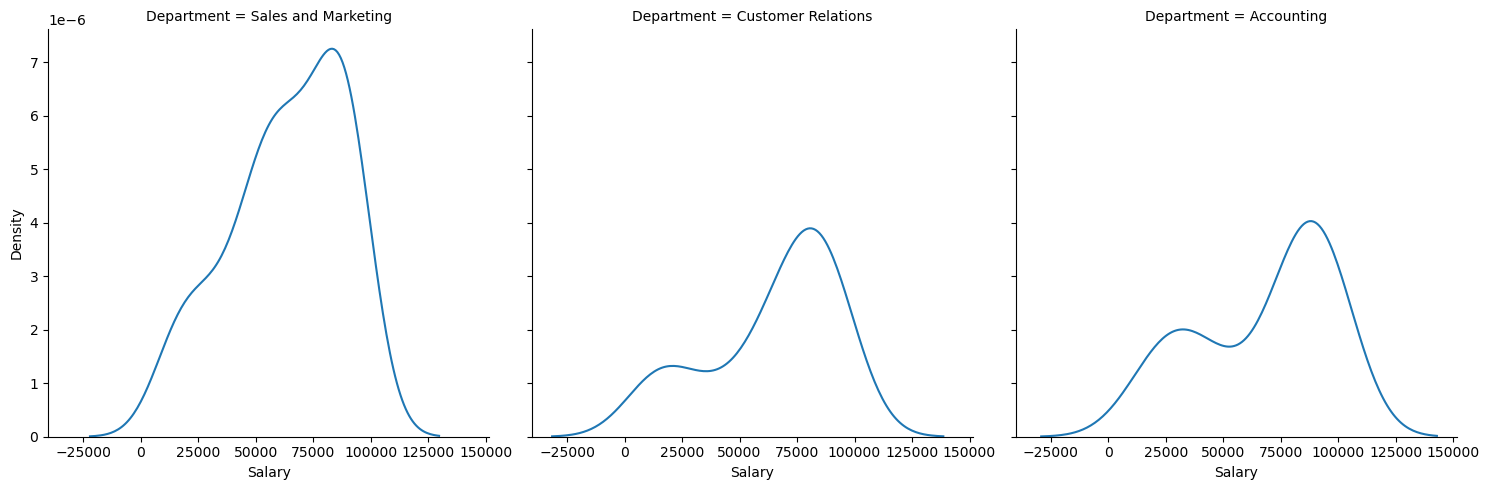

In [29]:
sns.displot(data=mydata,x='Salary',kind='kde',col='Department')

In [28]:
# Label Encoding for categorical columns :
# Department
# 1.One hot encoder :
# we get as many columns as many categories are there
# 2.Label encoding :
# one column will be replaced by other column but having no values

In [32]:
# one hot encoder :
df_onehot=pd.get_dummies(mydata['Department'],dtype='int')

In [33]:
df_onehot

,Accounting,Customer Relations,Sales and Marketing
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
95,0,0,1
96,0,0,1
97,0,1,0
98,0,1,0


In [39]:
#pip install scikitlearn

In [34]:
# Label Encoder
# sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mydata['Department']=le.fit_transform(mydata['Department'])

In [35]:
mydata['Department']

0     2
1     2
2     1
3     1
4     0
     ..
95    2
96    2
97    1
98    1
99    0
Name: Department, Length: 100, dtype: int32

In [36]:
mydata.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,2,28.0,3.0,32889
1,2,Sheila,Garza,2,22.0,1.0,15944
2,3,John,Bryant,1,22.0,1.0,40343
3,4,Christian,Farley,1,22.0,1.0,19018
4,5,Colorado,Bowen,0,27.0,0.0,24795


In [37]:
onehotdata=pd.concat([mydata,df_onehot],axis=1)

In [38]:
onehotdata.drop('Department',axis=1,inplace=True)

In [39]:
onehotdata

,Employee Id,First Name,Last Name,Age,Experience,Salary,Accounting,Customer Relations,Sales and Marketing
0,1,Joy,Bass,28.0,3.0,32889,0,0,1
1,2,Sheila,Garza,22.0,1.0,15944,0,0,1
2,3,John,Bryant,22.0,1.0,40343,0,1,0
3,4,Christian,Farley,22.0,1.0,19018,0,1,0
4,5,Colorado,Bowen,27.0,0.0,24795,1,0,0
...,...,...,...,...,...,...,...,...,...
95,96,Tyrone,Barber,47.0,22.0,79077,0,0,1
96,97,Urielle,Herrera,46.0,20.0,81187,0,0,1
97,98,Brendan,Solis,44.0,18.0,83847,0,1,0
98,99,Holmes,Nelson,47.0,22.0,89158,0,1,0


In [40]:

### scaling :
## scaling is done in order to bring all the numerical columns 
# on the same scale.
# scaling will ensure us that same weightage is given to all the
# columns so that no biasing will be there.
# scaling can be done using two mwthods
#1.Standardization
#2.Min max Scaler
# What is the diff beween Std and Min max scaler .
#          Std  Scaler                        Min max Scaler
# formula ==> x-xbar/sigma                    x-xmin/xmax-xmin
#  xbar=mean, sigma=std deviation
# converts data into std normal              the vavlues of col 
# dist where mean is 0 and std dev is 1      can vary from 0 to 1
#  mean and std dev is used                  min and max is used
#  not sensitive to outlier                  sensitive to outlier
# 

In [30]:
# Standardization :
from sklearn.preprocessing import StandardScaler


In [41]:
onehotdata

,Employee Id,First Name,Last Name,Age,Experience,Salary,Accounting,Customer Relations,Sales and Marketing
0,1,Joy,Bass,28.0,3.0,32889,0,0,1
1,2,Sheila,Garza,22.0,1.0,15944,0,0,1
2,3,John,Bryant,22.0,1.0,40343,0,1,0
3,4,Christian,Farley,22.0,1.0,19018,0,1,0
4,5,Colorado,Bowen,27.0,0.0,24795,1,0,0
...,...,...,...,...,...,...,...,...,...
95,96,Tyrone,Barber,47.0,22.0,79077,0,0,1
96,97,Urielle,Herrera,46.0,20.0,81187,0,0,1
97,98,Brendan,Solis,44.0,18.0,83847,0,1,0
98,99,Holmes,Nelson,47.0,22.0,89158,0,1,0


In [43]:
num_data=onehotdata.iloc[:,3:]
num_data.head()

,Age,Experience,Salary,Accounting,Customer Relations,Sales and Marketing
0,28.0,3.0,32889,0,0,1
1,22.0,1.0,15944,0,0,1
2,22.0,1.0,40343,0,1,0
3,22.0,1.0,19018,0,1,0
4,27.0,0.0,24795,1,0,0


In [44]:
# using Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(num_data)

In [45]:
x_scaled

array([[-1.16485118e+00, -1.81044925e+00, -1.23482325e+00,
        -6.08163641e-01, -5.61951487e-01,  1.02020406e+00],
       [-1.86547071e+00, -2.11817433e+00, -1.88508853e+00,
        -6.08163641e-01, -5.61951487e-01,  1.02020406e+00],
       [-1.86547071e+00, -2.11817433e+00, -9.48775604e-01,
        -6.08163641e-01,  1.77951304e+00, -9.80196059e-01],
       [-1.86547071e+00, -2.11817433e+00, -1.76712361e+00,
        -6.08163641e-01,  1.77951304e+00, -9.80196059e-01],
       [-1.28162110e+00, -2.27203688e+00, -1.54543093e+00,
         1.64429429e+00, -5.61951487e-01, -9.80196059e-01],
       [-1.39839102e+00, -1.50272416e+00, -1.90646343e+00,
         1.64429429e+00, -5.61951487e-01, -9.80196059e-01],
       [-1.63193087e+00, -1.34886162e+00, -1.18769869e+00,
        -6.08163641e-01,  1.77951304e+00, -9.80196059e-01],
       [-1.04808125e+00, -1.96431179e+00, -1.87914039e+00,
        -6.08163641e-01,  1.77951304e+00, -9.80196059e-01],
       [-1.04808125e+00, -1.50272416e+00, -8.811

In [46]:
# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_scaled=sc.fit_transform(num_data)

In [47]:
x_scaled

array([[2.14285714e-01, 1.20000000e-01, 2.43879560e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 4.00000000e-02, 4.76433121e-02, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 4.00000000e-02, 3.30202664e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.00000000e-02, 8.32426173e-02, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.78571429e-01, 0.00000000e+00, 1.50144760e-01, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.42857143e-01, 2.00000000e-01, 4.11928199e-02, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [7.14285714e-02, 2.40000000e-01, 2.58100753e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.50000000e-01, 8.00000000e-02, 4.94383324e-02, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.50000000e-01, 2.00000000e-01, 3.50607991e-01, 0.00000000e+00,
        0.00000000e+00, 

In [48]:
num_data.values

array([[2.80000000e+01, 3.00000000e+00, 3.28890000e+04, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.20000000e+01, 1.00000000e+00, 1.59440000e+04, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.20000000e+01, 1.00000000e+00, 4.03430000e+04, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.20000000e+01, 1.00000000e+00, 1.90180000e+04, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.70000000e+01, 0.00000000e+00, 2.47950000e+04, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.60000000e+01, 5.00000000e+00, 1.53870000e+04, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.40000000e+01, 6.00000000e+00, 3.41170000e+04, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.90000000e+01, 2.00000000e+00, 1.60990000e+04, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.90000000e+01, 5.00000000e+00, 4.21050000e+04, 0.00000000e+00,
        0.00000000e+00, 